# Tiktok Project

### Business Scenario & Problem

**Project Background**

TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly. 
TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.



### Plan
Objectives:
1. Understand data, get basic information.
2. Clean and prepare data for the *Analyse* stage.

### Import Packages

In [1]:
# Uncomment to install packages
""" ! pip install numpy
! pip install  pandas
! pip install matplotlib
! pip install seaborn
! pip install scipy
! pip install sklearn
! pip install xgboost """

' ! pip install numpy\n! pip install  pandas\n! pip install matplotlib\n! pip install seaborn\n! pip install scipy\n! pip install sklearn\n! pip install xgboost '

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
df.shape

(19382, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
df.describe(include = 'all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a colleague read in the media that butterflie...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


#### Data Pre-processing
1. Check for NA.
2. Check for duplicates.
3. Check for outliers.

In [7]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
df_archive = df.copy()  # Creating a copy of the original dataframe

In [9]:
df = df.dropna(axis = 0)  # Dropping rows with missing values

In [10]:
df.duplicated().sum()

np.int64(0)

No duplicates in the data. Moving on.

In [11]:
# If duplicates are found, uncomment the below line to drop them
# df = df.drop_duplicates(keep = 'first')

We will use boxplot to find outliers.

In [12]:
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

Outliers for below columns need to be checked.
1. `video_view_count`
2. `video_like_count`
3. `video_share_count`
4. `video_download_count`
5. `video_comment_count`

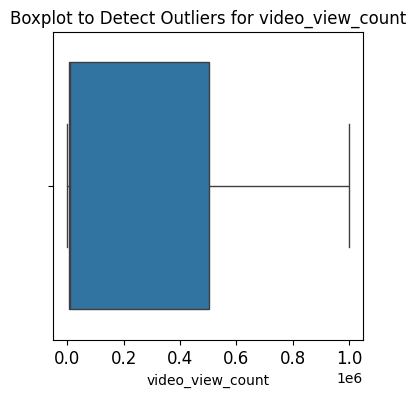

In [13]:
# Outlier for video_view_count
plt.figure(figsize = (4, 4))
plt.title('Boxplot to Detect Outliers for video_view_count')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(data = df, x = 'video_view_count')
plt.show()

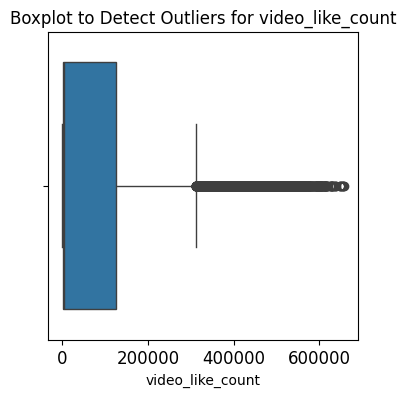

In [14]:
# Outlier for video_like_count
plt.figure(figsize = (4, 4))
plt.title('Boxplot to Detect Outliers for video_like_count')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(data = df, x = 'video_like_count')
plt.show()

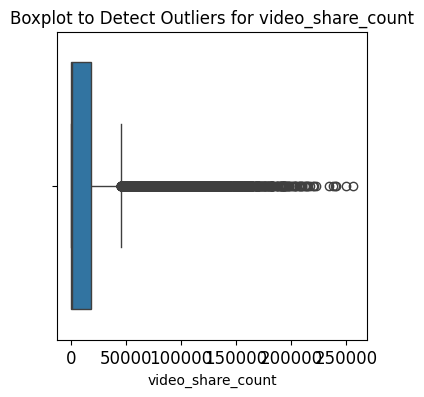

In [15]:
# Outlier for video_share_count
plt.figure(figsize = (4, 4))
plt.title('Boxplot to Detect Outliers for video_share_count')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(data = df, x = 'video_share_count')
plt.show()

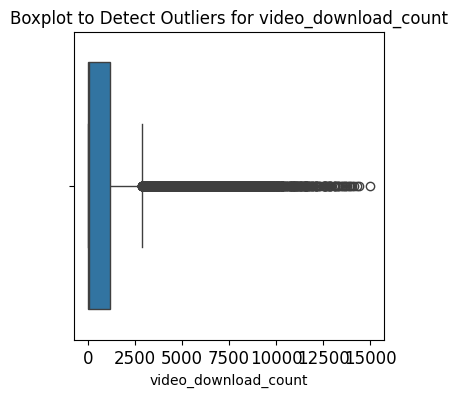

In [16]:
# Outlier for video_download_count
plt.figure(figsize = (4, 4))
plt.title('Boxplot to Detect Outliers for video_download_count')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(data = df, x = 'video_download_count')
plt.show()

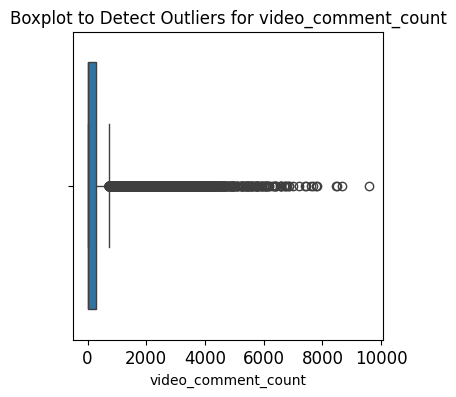

In [17]:
# Outlier for video_comment_count
plt.figure(figsize = (4, 4))
plt.title('Boxplot to Detect Outliers for video_comment_count')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(data = df, x = 'video_comment_count')
plt.show()

In [18]:
# Outlier Count for video_view_count
percentile_75 = df['video_view_count'].quantile(0.75)
percentile_25 = df['video_view_count'].quantile(0.25)
iqr = percentile_75 - percentile_25
lower_bound = percentile_25 - (1.5 * iqr)
upper_bound = percentile_75 + (1.5 * iqr)
outlier_count_view = df[(df['video_view_count'] < lower_bound) | (df['video_view_count'] > upper_bound)].shape[0]
print(f'Outlier Count for video_view_count: {outlier_count_view}')
# Outlier Count for video_like_count
percentile_75 = df['video_like_count'].quantile(0.75)
percentile_25 = df['video_like_count'].quantile(0.25)
iqr = percentile_75 - percentile_25
lower_bound = percentile_25 - (1.5 * iqr)
upper_bound = percentile_75 + (1.5 * iqr)
outlier_count_like = df[(df['video_like_count'] < lower_bound) | (df['video_like_count'] > upper_bound)].shape[0]
print(f'Outlier Count for video_like_count: {outlier_count_like}')
# Outlier Count for video_share_count
percentile_75 = df['video_share_count'].quantile(0.75)
percentile_25 = df['video_share_count'].quantile(0.25)
iqr = percentile_75 - percentile_25
lower_bound = percentile_25 - (1.5 * iqr)
upper_bound = percentile_75 + (1.5 * iqr)
outlier_count_share = df[(df['video_share_count'] < lower_bound) | (df['video_share_count'] > upper_bound)].shape[0]
print(f'Outlier Count for video_share_count: {outlier_count_share}')
# Outlier Count for video_download_count
percentile_75 = df['video_download_count'].quantile(0.75)
percentile_25 = df['video_download_count'].quantile(0.25)
iqr = percentile_75 - percentile_25
lower_bound = percentile_25 - (1.5 * iqr)
upper_bound = percentile_75 + (1.5 * iqr)
outlier_count_download = df[(df['video_download_count'] < lower_bound) | (df['video_download_count'] > upper_bound)].shape[0]
print(f'Outlier Count for video_download_count: {outlier_count_download}')
# Outlier Count for video_comment_count
percentile_75 = df['video_comment_count'].quantile(0.75)
percentile_25 = df['video_comment_count'].quantile(0.25)
iqr = percentile_75 - percentile_25
lower_bound = percentile_25 - (1.5 * iqr)
upper_bound = percentile_75 + (1.5 * iqr)
outlier_count_comment = df[(df['video_comment_count'] < lower_bound) | (df['video_comment_count'] > upper_bound)].shape[0]
print(f'Outlier Count for video_comment_count: {outlier_count_comment}')

Outlier Count for video_view_count: 0
Outlier Count for video_like_count: 1726
Outlier Count for video_share_count: 2508
Outlier Count for video_download_count: 2450
Outlier Count for video_comment_count: 2789


We have outliers in all columns except `video_view_count`.
Certain models are senitive to outliers. We will think about removing these outliers based on the model we choose later.

### EDA
Objectives:
1. Observe relationships between variables.
2. Distribution of the data.
3. Transform the data to prepare for models.


In [19]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


#### Find Data Balance

In [20]:
print(df['verified_status'].value_counts())
print(df['verified_status'].value_counts(normalize = True))


verified_status
not verified    17884
verified         1200
Name: count, dtype: int64
verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64


Non-verified accounts represent 93.7% of the dataset.

In [21]:
print(df['author_ban_status'].value_counts())
print(df['author_ban_status'].value_counts(normalize = True))

author_ban_status
active          15383
under review     2066
banned           1635
Name: count, dtype: int64
author_ban_status
active          0.806068
under review    0.108258
banned          0.085674
Name: proportion, dtype: float64


Only 8.5% of accounts are banned.

In [22]:
print(df['claim_status'].value_counts())
print(df['claim_status'].value_counts(normalize = True))

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64
claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


There is almost no bias in `claim_status`.

#### Hypothesis testing


**Null Hypothesis ($H_0$)**: There is no difference in number of views between Tiktok videos posted by verified accounts and by unverified accounts. Any observed difference in the sampling data is due to chance.

**Alternative Hypothesis ($H_A$)**: There is a difference in number of views between Tiktok videos posted by verified accounts and by unverified accounts. Any difference in sampling data is due to an actual difference in the correcponding population means.

In [23]:
# 2 Sample t-test to compare means of video_view_count between verified and unverified accounts
import scipy.stats as stats

not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
verified = df[df["verified_status"] == "verified"]["video_view_count"]

# Hypothesis Testing Code
stats.ttest_ind(a = not_verified, b = verified, equal_var = False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

We consider significance level of 5%. Since p value (2.6*10^-120) is much less than 5%, we reject the null hypothesis.
Which means, there is a statistically sinificant difference between video view counts published by both verified and non verified accounts.

___________________________________________________________________________________________
### Regression Analysis
First, we will try logistic regression analysis for verified status.

In [24]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [25]:
# First, make a filtered dataset by removing anomalies, as regressions can't handle anomalies.

percentile25 = df["video_like_count"].quantile(0.25)
percentile75 = df["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_like_count"] > upper_limit, "video_like_count"] = upper_limit


percentile25 = df["video_comment_count"].quantile(0.25)
percentile75 = df["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit




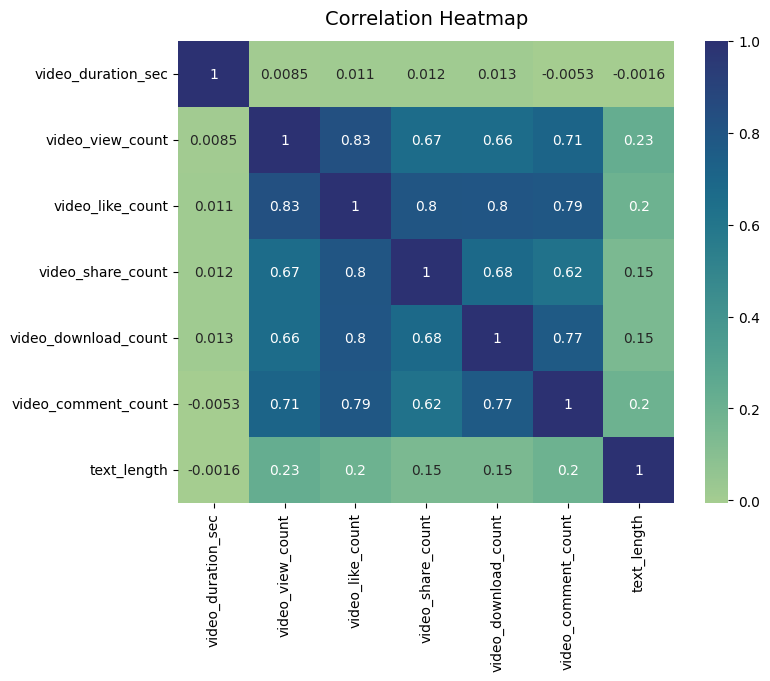

In [26]:
# Correlation Plot

# Remove video_id, & video_transcription_text to run smoothly
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df["text_length"] = df["video_transcription_text"].apply(func=lambda text: len(text))
df_sample = df[['video_duration_sec',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length']]

# df_sample = df_sample.sample(n = 1000, replace = False, random_state = 0)
plt.figure(figsize = (8, 6))
heatmap = sns.heatmap(df_sample.corr(),
                      annot = True,
                      cmap = 'crest')
heatmap.set_title("Correlation Heatmap", fontdict = {'fontsize': 14}, pad = 12);

One of the assumptions for logistic regression is that no two independent parameters are strongly correlated with eachother, in other words assumption of no multilinearity.
We now select features accordingly. `video_like_count` seems to be highly correlated to other features, so we can exclude `video_like_count`.

We select `video_view_count`, `video_comment_count`, `video_share_count`, and `video_download_count`.

#### Data balance is corrected before moving foreward.
This step is ususally preserved for extreme data imbalance, if this doesn't help with predictions, best to skip the step.

In [27]:
# Identify data points from majority and minority classes
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
# Load Library
from sklearn.utils import resample

data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
df_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [28]:
y = df_upsampled['verified_status']

X = df_upsampled[['claim_status', 'author_ban_status', 'video_view_count', 'video_comment_count',
                  'video_share_count', 'video_download_count', 'video_duration_sec']]

X.head(5)


,claim_status,author_ban_status,video_view_count,video_comment_count,video_share_count,video_download_count,video_duration_sec
0,claim,under review,343296.0,0.0,241.0,1.0,59
1,claim,active,140877.0,684.0,19034.0,1161.0,32
2,claim,active,902185.0,329.0,2858.0,833.0,31
3,claim,active,437506.0,584.0,34812.0,1234.0,25
4,claim,active,56167.0,152.0,4110.0,547.0,19


#### Train Test Split

In [29]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((26826, 7), (8942, 7), (26826,), (8942,))

#### Encode Literal Variables for Regression

Encode **X_train**

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26826 entries, 33058 to 2732
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          26826 non-null  object 
 1   author_ban_status     26826 non-null  object 
 2   video_view_count      26826 non-null  float64
 3   video_comment_count   26826 non-null  float64
 4   video_share_count     26826 non-null  float64
 5   video_download_count  26826 non-null  float64
 6   video_duration_sec    26826 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


`claim_status` and `author_ban_status` should be encoded. We will select these two columns and encode separately and use OneHotEncoder to encode and merge later to the original X_train data. y_train will also be encoded similar fashion.

In [31]:
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [32]:
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [33]:
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [34]:
# Create an encoder first.
X_encoder = OneHotEncoder(drop = 'first', sparse_output = False)

# Encode X_train_to_encode with the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [35]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(26826, 3))

In [36]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [37]:
X_train.drop(columns=['claim_status', 'author_ban_status'])
X_train_final = pd.concat([X_train.drop(columns=['claim_status', 
                                                'author_ban_status']).reset_index(drop = True),
                          X_train_encoded_df], axis = 1)
X_train_final.head()

,video_view_count,video_comment_count,video_share_count,video_download_count,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2252.0,0.0,23.0,4.0,33,1.0,0.0,0.0
1,6664.0,2.0,550.0,53.0,52,1.0,0.0,0.0
2,6327.0,0.0,257.0,3.0,37,1.0,0.0,0.0
3,1702.0,0.0,28.0,0.0,57,1.0,0.0,0.0
4,3842.0,0.0,101.0,1.0,21,1.0,0.0,0.0


Encode **X_test**

In [38]:
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, 
                                 columns=X_encoder.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=["claim_status", 
                                               "author_ban_status"]).reset_index(drop=True), 
                          X_test_encoded_df], axis=1)
X_test_final.head()


,video_view_count,video_comment_count,video_share_count,video_download_count,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2118.0,2.0,57.0,5.0,41,1.0,0.0,0.0
1,5701.0,0.0,157.0,1.0,27,1.0,0.0,0.0
2,449767.0,728.5,75385.0,5956.0,31,0.0,0.0,0.0
3,792813.0,728.5,56597.0,5146.0,19,0.0,0.0,0.0
4,2044.0,2.0,68.0,19.0,54,1.0,0.0,0.0


Encode **y_train**

In [39]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [40]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

y_train_final

array([1., 1., 1., ..., 1., 1., 0.], shape=(26826,))

Encode **y_test**

In [41]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.], shape=(8942,))

### Model Building and Evaluation
Build and fit **logistic regression** model.

In [42]:
log_clf = LogisticRegression(random_state=0, max_iter=2000).fit(X_train_final, y_train_final)

Evaluate model.

In [43]:
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.], shape=(8942,))

#### Visualize Model Results

**Confusion Matrix**

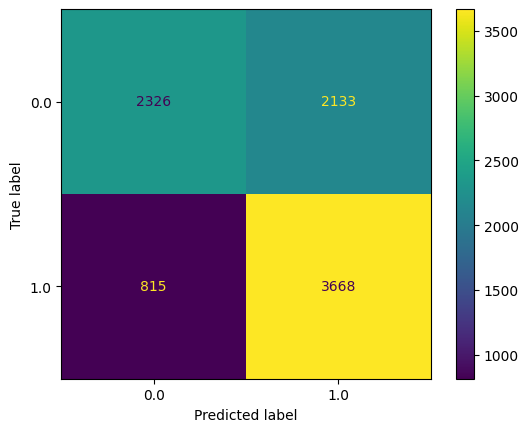

In [44]:
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

log_disp.plot()
plt.show()

Upper left corner of the quartrand is the number of true negatives. That is, the number of videos posted by unverified accounts that the model accurately predicted. Similarly, bottom right corner displays the true positives, which is the number of videos posted by verified accounts accuated predicted by the model.

Upper right corner displays false positives and bottom left displays false negatives. The prediction contains large number of false positive. 


In [45]:
target_label = ['verified', 'not verified']
print(classification_report(y_test_final, y_pred, target_names=target_label))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



The classification report shows that the model achieved a precision of 63%, recall of 82% and accuracy of 67%. The metrics are taken from not verified row, since that is the target class we are intersted in. 

In [46]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, 
                   "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_view_count,-1.687667e-07
1,video_comment_count,4.482319e-04
2,video_share_count,4.826129e-06
3,video_download_count,-8.108572e-05
4,video_duration_sec,-2.455062e-03
5,claim_status_opinion,1.702642e+00
6,author_ban_status_banned,-4.483861e-01
7,author_ban_status_under review,-9.866928e-02


In [47]:
print(np.exp(1.702642))
print(-np.exp(-.4483861)) # Decrease
print(-np.exp(-.09866928)) # Decrease

5.488428682097241
-0.6386580505490692
-0.9060423047905367


**Conclusion from Regression Analysis**

* Logistic regression is not advisable due to the dataset containing many strongly correlated variables. Dropping `video_like_count` may have reduced some of the influence.
* According to the model, by far `claim_status_opinion` has the strongest effect. It has **5.5X** increase in odds compared to `claim_status`[claim].  `author_ban_status_banned` has ~37% of decrease in odds. `author_ban_status_under review` has ~9& decrease in odds.

* The model achieved a precision of 63%, recall of 82% and accuracy of 67%. Though the recall is good, but the low accuracy is not acceptable.

___________________________________________________________________________________________

### Build Machine Learning Models

We will go back to the original dataset `df`.

In [48]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [49]:
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

In [50]:
df_fil = df[['claim_status', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length']]
df_fil.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


#### Feature Selection

In [51]:
df_fil['claim_status'] = df_fil['claim_status'].replace({'opinion': 0,
                                                       'claim': 1})
df_dummies = pd.get_dummies(df_fil,
                            columns=['verified_status', 'author_ban_status'],
                            drop_first=True)
df_dummies.head()

C:\Users\Vyshnav TC\AppData\Local\Temp\ipykernel_36904\1644198893.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fil['claim_status'] = df_fil['claim_status'].replace({'opinion': 0,
C:\Users\Vyshnav TC\AppData\Local\Temp\ipykernel_36904\1644198893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['claim_status'] = df_fil['claim_status'].replace({'opinion': 0,


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


Convert `video_transcription_text` to something we can make use of. For that, we will be using `CountVectorizer`.

In [52]:
# Set up a CountVectorizer
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(2, ...)"
,analyzer,'word'


In [53]:
count_data = count_vec.fit_transform(df_dummies['video_transcription_text']).toarray()
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

count_df.head()

,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df_final = pd.concat([df_dummies.drop(columns=
                                        ['video_transcription_text']).reset_index(drop = 
                                                                                  True),
                                        count_df], axis=1)
df_final.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,...,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,...,0,0,0,0,0,0,0,0,0,0


Train Test Split

In [55]:
y = df_final['claim_status']

X = df_final.drop(columns=['claim_status'], axis = 1)

X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True,...,0,0,0,0,0,0,0,0,0,0
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Get Train and test data, X_tr is not final as we have to create validation dataset later.
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (3817, 25), (26826,), (3817,))

In [57]:
# Get validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, 
                                                  test_size=0.25, 
                                                  random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11450, 25), (3817, 25), (11450,), (3817,))

### Build Random Forest Model

In [58]:
# Load Libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV


In [59]:
# Instantiate randomforest model
rf = RandomForestClassifier(random_state=0)
# Create dictionary for hyperparameters to tune
cv_param = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_param, scoring=scoring, cv = 5, refit='recall')

In [60]:
%%time
# Fit the model, note time taken using magic command
rf_cv.fit(X_train, y_train)

CPU times: total: 5min 18s
Wall time: 5min 42s


,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [5, 7, ...], 'max_features': [0.3, 0.6], 'max_samples': [0.7], 'min_samples_leaf': [1, 2], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'recall'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [61]:
rf_cv.best_score_

np.float64(0.9946502627928012)

In [62]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [63]:
rf_cv.cv_results_

{'mean_fit_time': array([0.31104136, 0.47795639, 0.8445436 , 0.29749098, 0.38843479,
        0.76525979, 0.28507977, 0.41173062, 0.81113048, 0.27039237,
        0.37773423, 0.92409019, 0.53492756, 0.87158127, 1.36415467,
        0.50627213, 0.761237  , 1.43540154, 0.62463074, 0.82788167,
        1.45446978, 0.54079294, 0.63882618, 1.61677628, 0.51744452,
        0.54589572, 1.07287297, 0.3521482 , 0.70303998, 0.96257267,
        0.34979897, 0.4520277 , 0.91657715, 0.35220909, 0.44469914,
        0.92636967, 0.55717444, 0.75327821, 2.03065085, 0.91982007,
        1.08147707, 1.49765482, 0.5449563 , 0.73329082, 1.48420825,
        0.63691101, 0.9049458 , 1.72609277, 0.56522379, 0.75462775,
        1.48579421, 0.56400833, 0.68611364, 1.47459559, 0.5311089 ,
        0.86102142, 1.79492545, 0.68541255, 0.59015813, 1.53684487,
        0.83940134, 1.10684538, 2.22698665, 0.84538422, 1.10657473,
        2.23673601, 0.79109564, 1.19763703, 2.2020731 , 0.97974291,
        1.34302311, 2.26608481]

In [64]:
# Convert results into dataframe to compare later
rf_results_df = pd.DataFrame(rf_cv.cv_results_)
rf_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_samples',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1',
       'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1'],


In [65]:
# Mean precision at best index
rf_results_df['mean_test_precision'][rf_cv.best_index_]

np.float64(0.9994808149105155)

In [66]:
# Mean recall score at best index
rf_results_df['mean_test_recall'][rf_cv.best_index_]

np.float64(0.9946502627928012)

In [67]:
# Mean accuracy at best index
rf_results_df['mean_test_accuracy'][rf_cv.best_index_]

np.float64(0.9970305676855895)

**Insight:**

The model has mean precision of 99.95% and recall score of 99.5%, which to say is exceptionally good.

### Build XGBoost Model

In [68]:
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearch
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv = 5, refit='recall')

In [69]:
%%time

xgb_cv.fit(X_train, y_train)

CPU times: total: 10min 2s
Wall time: 1min 28s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, ...], 'min_child_weight': [3, 5], 'n_estimators': [300, 500]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'recall'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [70]:
xgb_cv.best_score_

np.float64(0.9898176171763818)

In [71]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

In [72]:
# Convert results into dataframe
xgb_results_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_min_child_weight',
       'param_n_estimators', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1',
       'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1'],
      dtype='object')

In [73]:
xgb_results_df['mean_test_precision'][xgb_cv.best_index_]

np.float64(0.9986058073717686)

In [74]:
xgb_results_df['mean_test_recall'][xgb_cv.best_index_]

np.float64(0.9898176171763818)

In [75]:
xgb_results_df['mean_test_accuracy'][xgb_cv.best_index_]

np.float64(0.9941484716157205)

**Insights:**

This model also has good performance though not as high is recall score as random forest.

### Evaluate Models

#### **Random Forest**

In [76]:
# Use the random forest's best estimator to predict validation set 
y_pred = rf_cv.best_estimator_.predict(X_val)
y_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(3817,))

In [77]:
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

We will confusion matrix to compare actual vs predicted.

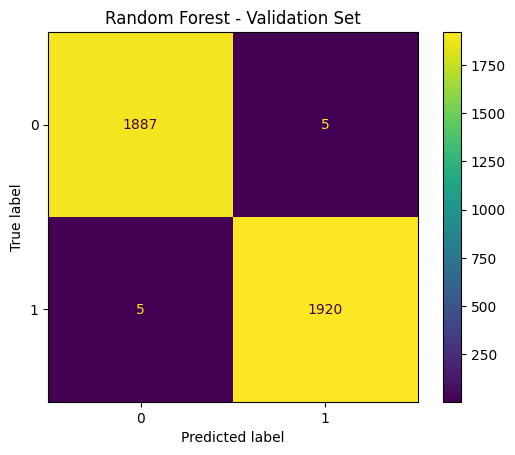

In [78]:
cm = confusion_matrix(y_val, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

cm_disp.plot()

plt.title('Random Forest - Validation Set');

plt.show()

In [79]:
# Classification Report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Insights:**

* The model is able to predict true positive and true negative very effectively.
* Only 5 false negatives and 5 false positives.
* Classification report displays 100% score in all metrics (Though we know the thy were some loss, it 5 false pos/neg each).


#### **XGB Boost**

In [80]:
y_pred = xgb_cv.best_estimator_.predict(X_val)
y_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(3817,))

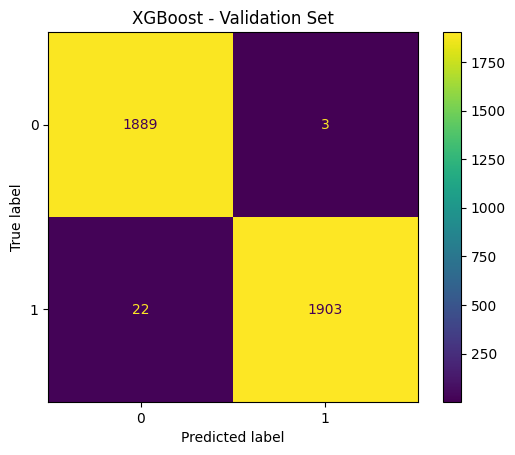

In [81]:
# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
cm_disp.plot()

# Display plot
plt.title('XGBoost - Validation Set');
plt.show()


In [82]:
# Classification Report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Insights:**

* There seems to be slightly more false negatives in XGBoost than random forest.
* Our priority is identifying claim videos, in that case the model is excellent.
* Random forest has done well is all sores, hence we will be moving foreward with random forest model.

### Use Champion Model to Predict Test Data

In [83]:
y_pred = rf_cv.best_estimator_.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], shape=(3817,))

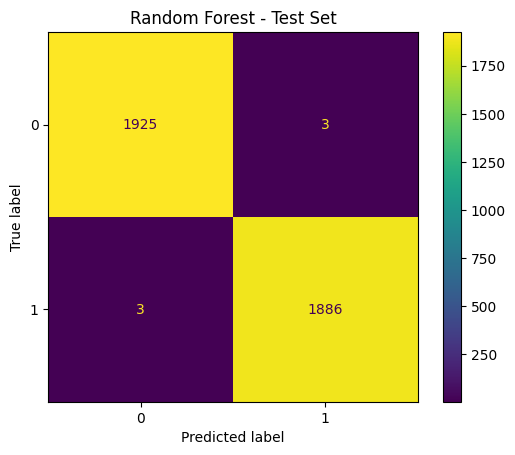

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

cm_disp.plot()

plt.title('Random Forest - Test Set');

plt.show()

#### Feature Importance of Champion Model

In [85]:
importance = rf_cv.best_estimator_.feature_importances_
rf_importance = pd.Series(importance, index=X_test.columns)

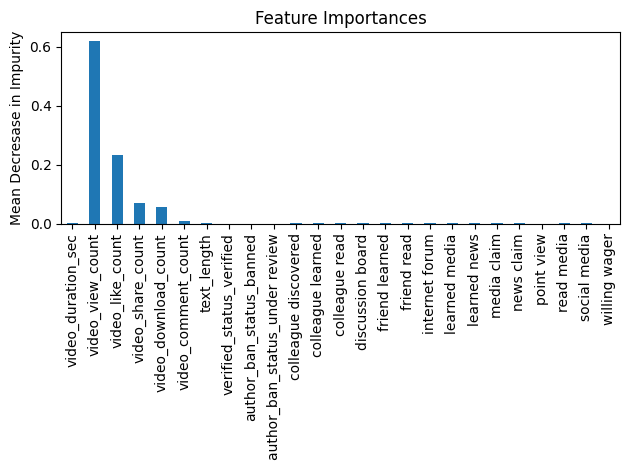

In [86]:
fig, axes = plt.subplots()
rf_importance.plot.bar(ax = axes)
axes.set_title('Feature Importances')
axes.set_ylabel('Mean Decresase in Impurity')
fig.tight_layout()

The most predictive features are:
`video_view_count`, `video_like_count`, `video_share_count`, `video_download_count` which are all related to engagement of the video as we have seen in analysis above.